In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
df_train = pd.read_csv("train.csv")
print(df_train.describe())
df_train.shape

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


(891, 12)

In [23]:
print(df_train.shape)
print(df_train.isnull().sum())

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [24]:
df_train.drop(columns = ['Cabin'], inplace = True)
df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)
print(df_train.shape)
print(df_train['Age'].mean().dtype)

(891, 11)
float64


In [25]:
print(df_train)
print(print(df_train.isnull().sum()))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [26]:
print(df_test.shape)
print(df_test.isnull().sum())

(891, 11)
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [27]:
df_train['Sex'].replace({'male':1, 'female':0}, inplace = True)
df_test['Sex'].replace({'male':1, 'female':0}, inplace = True)

In [28]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [29]:
# Manually Splitting the dataset into testing and training datasets
# Training Data
x = df_train.drop(columns=['Name', 'Ticket', 'Fare', 'Embarked', 'Survived'])
y = df_train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [30]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

Precision :  0.7821229050279329
Recall :  0.7821229050279329
Accuracy :  0.7821229050279329
F1 Score :  0.7821229050279329

 [[93 13]
 [26 47]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       106
           1       0.78      0.64      0.71        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

******************************************************



C:\Users\aman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


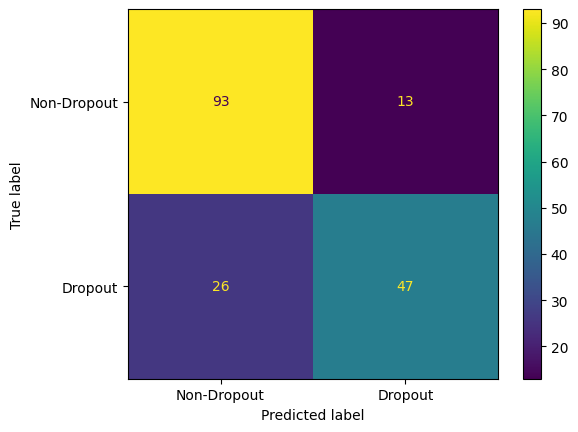

In [31]:
#Logistic regression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
perform(y_pred_lr)

Precision :  0.776536312849162
Recall :  0.776536312849162
Accuracy :  0.776536312849162
F1 Score :  0.776536312849162

 [[90 16]
 [24 49]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.75      0.67      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179

******************************************************



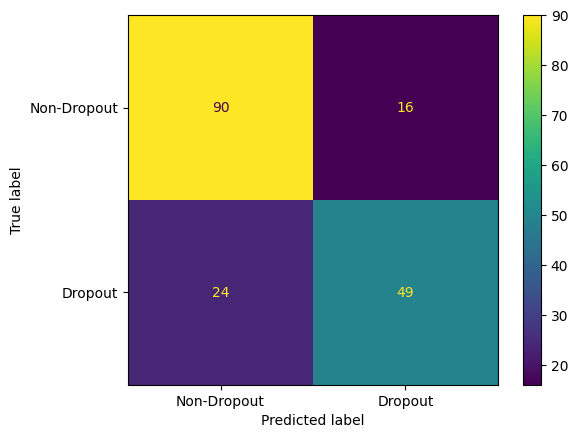

In [32]:
#Linear Regression
model_ler = LinearRegression()
model_ler.fit(x_train, y_train)
y_pred_ler = model_ler.predict(x_test)
y_pred_ler=np.round(y_pred_ler)
perform(y_pred_ler)

Precision :  0.7374301675977654
Recall :  0.7374301675977654
Accuracy :  0.7374301675977654
F1 Score :  0.7374301675977654

 [[86 20]
 [27 46]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       106
           1       0.70      0.63      0.66        73

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.73      0.74      0.74       179

******************************************************



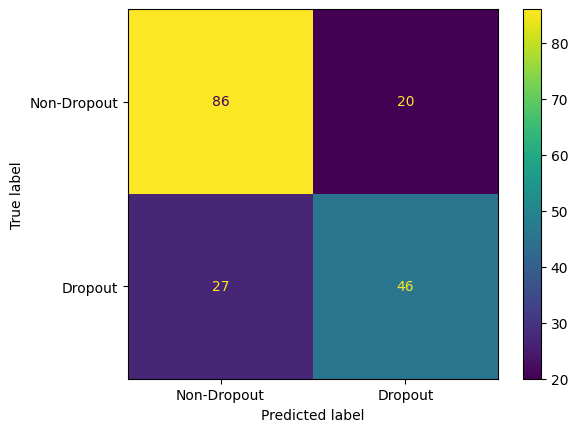

In [33]:
#Decision Tree
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)
y_pred_DTC = model_DTC.predict(x_test)
perform(y_pred_DTC)

Precision :  0.7653631284916201
Recall :  0.7653631284916201
Accuracy :  0.7653631284916201
F1 Score :  0.7653631284916201

 [[93 13]
 [29 44]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       106
           1       0.77      0.60      0.68        73

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179

******************************************************



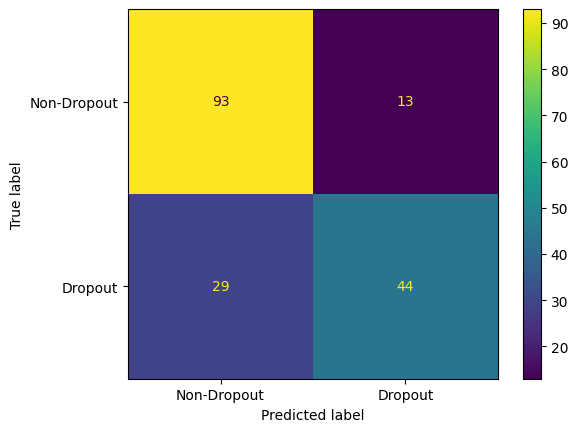

In [34]:
#Random Forest
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train, y_train)
y_pred_RFC = model_RFC.predict(x_test)
perform(y_pred_RFC)

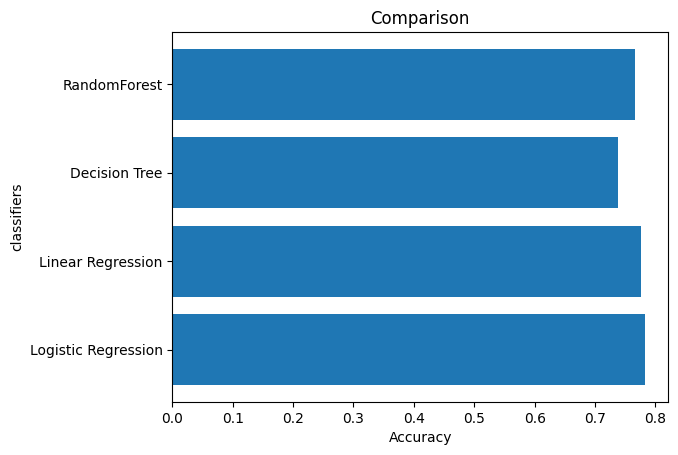

In [35]:
pred=[y_pred_lr,y_pred_ler,y_pred_DTC,y_pred_RFC]
acc=[]
classifiers=["Logistic Regression","Linear Regression","Decision Tree","RandomForest"]
for i in pred:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()
